In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip "/content/drive/MyDrive/Tugas Akhir/Dataset/fk6rys63h9-1.zip" -d "/content"

Archive:  /content/drive/MyDrive/Tugas Akhir/Dataset/fk6rys63h9-1.zip
  inflating: /content/Training_images.zip  
  inflating: /content/Test_images.zip  
  inflating: /content/Validation_images.zip  


In [ ]:
!unzip "/content/Training_images.zip" -d "/content"

Archive:  /content/Training_images.zip
   creating: /content/Training_images/
   creating: /content/Training_images/Negative/
 extracting: /content/Training_images/Negative/Negative_100_Coronary_007_RCA_Secondary1_11.png  
 extracting: /content/Training_images/Negative/Negative_101_Coronary_004_LAD_Secondary1_19.png  
 extracting: /content/Training_images/Negative/Negative_101_Coronary_004_LAD_Secondary2_16.png  
 extracting: /content/Training_images/Negative/Negative_101_Coronary_004_LAD_Secondary3_19.png  
 extracting: /content/Training_images/Negative/Negative_101_Coronary_004_LAD_Secondary4_16.png  
  inflating: /content/Training_images/Negative/Negative_101_Coronary_004_LAD_Secondary5_12.png  
 extracting: /content/Training_images/Negative/Negative_103_Coronary_103_RCA_Secondary2_8.png  
 extracting: /content/Training_images/Negative/Negative_103_Coronary_103_RCA_Secondary3_19.png  
 extracting: /content/Training_images/Negative/Negative_103_Coronary_103_RCA_Secondary6_14.png  
 e

In [ ]:
!unzip "/content/Test_images.zip" -d "/content"

Archive:  /content/Test_images.zip
   creating: /content/Test_images/
   creating: /content/Test_images/Negative/
 extracting: /content/Test_images/Negative/Negative_Coronary_008_CX1_1.png  
 extracting: /content/Test_images/Negative/Negative_Coronary_008_CX_Secondary1_1.png  
 extracting: /content/Test_images/Negative/Negative_Coronary_008_CX_Secondary2_1.png  
  inflating: /content/Test_images/Negative/Negative_Coronary_008_CX_Secondary3_1.png  
  inflating: /content/Test_images/Negative/Negative_Coronary_008_CX_Secondary4_1.png  
  inflating: /content/Test_images/Negative/Negative_Coronary_008_CX_Secondary5_1.png  
 extracting: /content/Test_images/Negative/Negative_Coronary_008_LAD1_1.png  
 extracting: /content/Test_images/Negative/Negative_Coronary_008_LAD_Secondary1_1.png  
  inflating: /content/Test_images/Negative/Negative_Coronary_008_LAD_Secondary2_1.png  
 extracting: /content/Test_images/Negative/Negative_Coronary_008_LAD_Secondary3_1.png  
 extracting: /content/Test_image

In [ ]:
!unzip "/content/Validation_images.zip" -d "/content"

Archive:  /content/Validation_images.zip
   creating: /content/Validation_images/
   creating: /content/Validation_images/Negative/
 extracting: /content/Validation_images/Negative/Negative_103_Coronary_414_LAD_Secondary5_2.png  
  inflating: /content/Validation_images/Negative/Negative_104_Coronary_357_CX_Secondary3_13.png  
  inflating: /content/Validation_images/Negative/Negative_107_Coronary_310_RCA_Secondary4_11.png  
 extracting: /content/Validation_images/Negative/Negative_107_Coronary_431_LAD_Secondary2_17.png  
  inflating: /content/Validation_images/Negative/Negative_112_Coronary_032_LAD_Secondary3_17.png  
 extracting: /content/Validation_images/Negative/Negative_114_Coronary_337_CX1_13.png  
 extracting: /content/Validation_images/Negative/Negative_115_Coronary_363_LAD_Secondary2_10.png  
  inflating: /content/Validation_images/Negative/Negative_115_Coronary_409_LAD_Secondary7_8.png  
 extracting: /content/Validation_images/Negative/Negative_115_Coronary_420_LAD_Secondary4_

In [ ]:
# Import Data Science Libraries
import numpy as np
import pandas as pd
import tensorflow as tf
import itertools
import random

# Import visualization libraries
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import cv2
import seaborn as sns

# Tensorflow Libraries
from tensorflow import keras
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import Callback, EarlyStopping,ModelCheckpoint
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications.efficientnet_v2 import preprocess_input
from tensorflow.keras import Model
from tensorflow.keras.layers.experimental import preprocessing

# System libraries
from pathlib import Path
import os.path

# Metrics
from sklearn.metrics import classification_report, confusion_matrix

sns.set(style='darkgrid')

In [ ]:
train_dataset_path = '/content/Training_images'
validation_dataset_path = '/content/Validation_images'
test_dataset_path = '/content/Test_images'

In [ ]:
import glob
negative_train_images = glob.glob("/content/Training_images/Negative/*.png")
positive_train_images = glob.glob("/content/Training_images/Positive/*.png")

negative_val_images = glob.glob("/content/Validation_images/Negative/*.png")
positive_val_images = glob.glob("/content/Validation_images/Positive/*.png")

negative_test_images = glob.glob("/content/Test_images/Negative/*.png")
positive_test_images = glob.glob("/content/Test_images/Positive/*.png")

In [ ]:
BATCH_SIZE = 32
TARGET_SIZE = (224, 224)

In [ ]:
train_data_path = '/content/Training_images'
filepaths =[]
labels = []
folds = os.listdir(train_data_path)

for fold in folds:
    f_path = os.path.join(train_data_path , fold)
    filelists = os.listdir(f_path)

    for file in filelists:
        filepaths.append(os.path.join(f_path , file))
        labels.append(fold)

Fseries = pd.Series(filepaths , name = 'filepaths')
Lseries = pd.Series(labels , name = 'label')
df = pd.concat([Fseries , Lseries], axis=1)
df

,filepaths,label
0,/content/Training_images/Negative/Negative_187...,Negative
1,/content/Training_images/Negative/Negative_134...,Negative
2,/content/Training_images/Negative/Negative_135...,Negative
3,/content/Training_images/Negative/Negative_140...,Negative
4,/content/Training_images/Negative/Negative_94_...,Negative
...,...,...
4663,/content/Training_images/Positive/Positive_255...,Positive
4664,/content/Training_images/Positive/Positive_182...,Positive
4665,/content/Training_images/Positive/Positive_126...,Positive
4666,/content/Training_images/Positive/Positive_251...,Positive


In [ ]:
import plotly.express as px

fig= px.histogram(data_frame= df,
           y= df['label'],
           template='plotly_dark',
           color= df['label'].values,
           title='Number of images in each class of the Train Data')
fig.show()

In [ ]:
test_data_path = '/content/Test_images'

filepaths =[]
labels = []
folds = os.listdir(test_data_path)

for fold in folds:
    f_path = os.path.join(test_data_path , fold)
    filelists = os.listdir(f_path)

    for file in filelists:
        filepaths.append(os.path.join(f_path , file))
        labels.append(fold)

Fseries = pd.Series(filepaths , name = 'filepaths')
Lseries = pd.Series(labels , name = 'label')
test = pd.concat([Fseries , Lseries], axis=1)
test

,filepaths,label
0,/content/Test_images/Negative/Negative_Coronar...,Negative
1,/content/Test_images/Negative/Negative_Coronar...,Negative
2,/content/Test_images/Negative/Negative_Coronar...,Negative
3,/content/Test_images/Negative/Negative_Coronar...,Negative
4,/content/Test_images/Negative/Negative_Coronar...,Negative
...,...,...
1186,/content/Test_images/Positive/Positive_Coronar...,Positive
1187,/content/Test_images/Positive/Positive_Coronar...,Positive
1188,/content/Test_images/Positive/Positive_Coronar...,Positive
1189,/content/Test_images/Positive/Positive_Coronar...,Positive


In [ ]:
import plotly.express as px

fig= px.histogram(data_frame= df,
           y= test['label'],
           template='plotly_dark',
           color= test['label'].values,
           title='Number of images in each class of the Test Data')
fig.show()

In [ ]:
test_data_path = '/content/Validation_images'

filepaths =[]
labels = []
folds = os.listdir(test_data_path)

for fold in folds:
    f_path = os.path.join(test_data_path , fold)
    filelists = os.listdir(f_path)

    for file in filelists:
        filepaths.append(os.path.join(f_path , file))
        labels.append(fold)

Fseries = pd.Series(filepaths , name = 'filepaths')
Lseries = pd.Series(labels , name = 'label')
valid = pd.concat([Fseries , Lseries], axis=1)
valid

,filepaths,label
0,/content/Validation_images/Negative/Negative_1...,Negative
1,/content/Validation_images/Negative/Negative_1...,Negative
2,/content/Validation_images/Negative/Negative_1...,Negative
3,/content/Validation_images/Negative/Negative_1...,Negative
4,/content/Validation_images/Negative/Negative_1...,Negative
...,...,...
95,/content/Validation_images/Positive/Positive_1...,Positive
96,/content/Validation_images/Positive/Positive_2...,Positive
97,/content/Validation_images/Positive/Positive_1...,Positive
98,/content/Validation_images/Positive/Positive_1...,Positive


In [ ]:
fig= px.histogram(data_frame= valid,
           y= valid['label'],
           template='plotly_dark',
           color=valid['label'].values,
           title='Number of images in each class of the Valid Data')
fig.show()

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Augmentasi Data
train_datagen = ImageDataGenerator(
    rescale=1./255.,
    rotation_range=5,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator(rescale=1./255.)
test_datagen = ImageDataGenerator(rescale=1./255.)

# Generator Data
train_generator = train_datagen.flow_from_directory(
    train_dataset_path,
    batch_size=32,
    target_size=(224, 224),
    class_mode='categorical',
    color_mode='rgb',
    shuffle=True,
    subset='training'
)

validation_generator = val_datagen.flow_from_directory(
    validation_dataset_path,
    batch_size=32,
    target_size=(224, 224),
    class_mode='categorical',
    color_mode='rgb',
    shuffle=False
)

test_generator = test_datagen.flow_from_directory(
    test_dataset_path,
    batch_size=32,
    target_size=(224, 224),
    class_mode='categorical',
    color_mode='rgb',
    shuffle=False
)


Found 4668 images belonging to 2 classes.
Found 100 images belonging to 2 classes.
Found 1191 images belonging to 2 classes.


In [ ]:
data = pd.DataFrame(np.concatenate([[0]*len(negative_train_images) , [1] *  len(positive_train_images)]),columns=["class"])

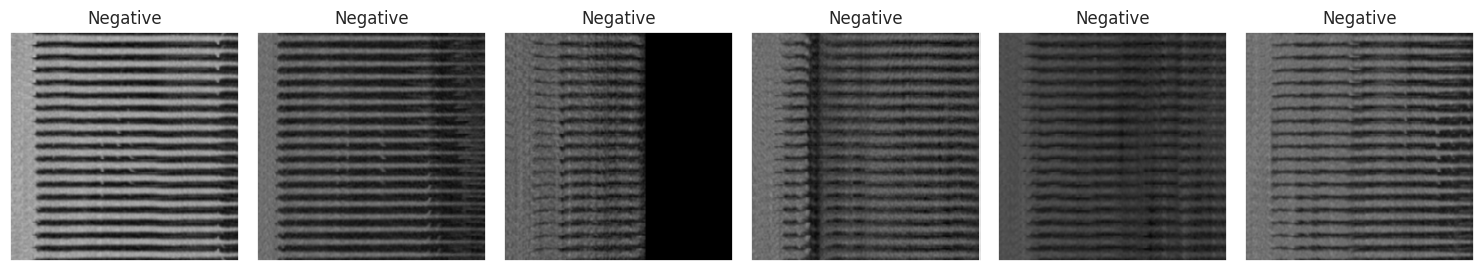

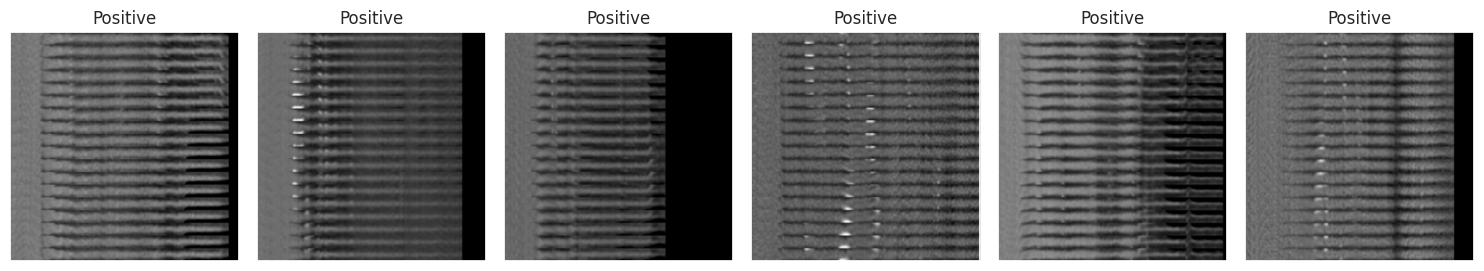

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=6, figsize=(15,10), subplot_kw={'xticks':[], 'yticks':[]})

for i, ax in enumerate(axes.flat):
    img = cv2.imread(negative_train_images[i])
    img = cv2.resize(img, (512,512))
    ax.imshow(img)
    ax.set_title("Negative")
fig.tight_layout()
plt.show()

fig, axes = plt.subplots(nrows=1, ncols=6, figsize=(15,10), subplot_kw={'xticks':[], 'yticks':[]})
for i, ax in enumerate(axes.flat):
    img = cv2.imread(positive_train_images[i])
    img = cv2.resize(img, (512,512))
    ax.imshow(img)
    ax.set_title("Positive")
fig.tight_layout()
plt.show()

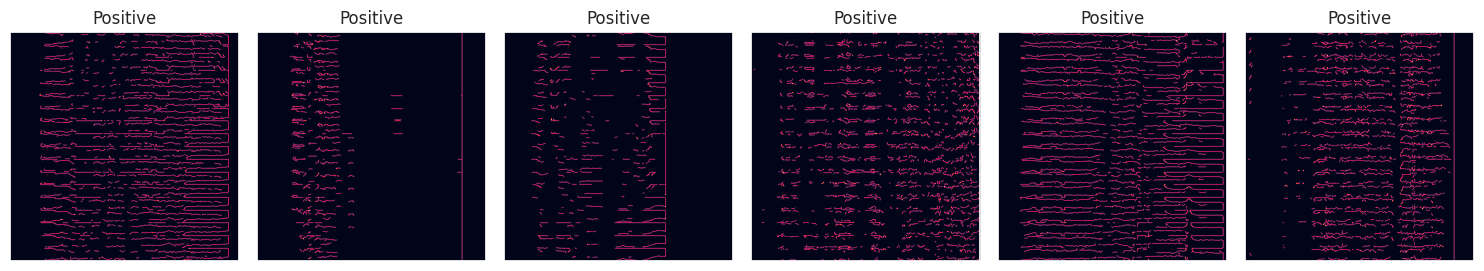

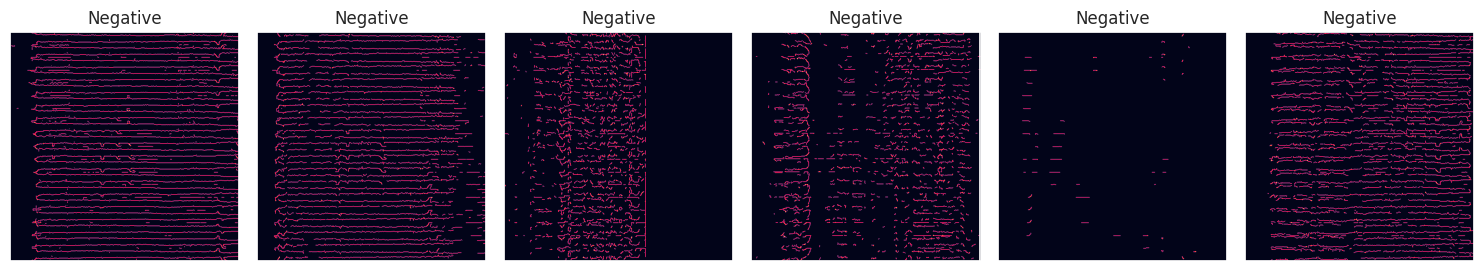

In [ ]:
import os
import tensorflow as tf
from keras.applications import ResNet50V2
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from keras.preprocessing.image import ImageDataGenerator
import keras
import seaborn as sns
import cv2
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.models import Sequential
from sklearn.metrics import classification_report
import seaborn as sns
import glob

fig, axes = plt.subplots(nrows=1, ncols=6, figsize=(15,10), subplot_kw={'xticks':[], 'yticks':[]})
for i, ax in enumerate(axes.flat):
    img = cv2.imread(positive_train_images[i])
    img = cv2.resize(img, (512,512))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = cv2.Canny(img, 80, 100)
    ax.imshow(img)
    ax.set_title("Positive")
fig.tight_layout()
plt.show()

fig, axes = plt.subplots(nrows=1, ncols=6, figsize=(15,10), subplot_kw={'xticks':[], 'yticks':[]})
for i, ax in enumerate(axes.flat):
    img = cv2.imread(negative_train_images[i])
    img = cv2.resize(img, (512,512))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = cv2.Canny(img, 80, 100)
    ax.imshow(img)
    ax.set_title("Negative")
fig.tight_layout()
plt.show()

In [ ]:
val_Positive = len(os.listdir('/content/Validation_images/Positive'))
val_Negative =len(os.listdir('/content/Validation_images/Negative'))
print(f'len(val_Negative) = {val_Negative}, len(val_Positive)={val_Positive}')

len(val_Negative) = 50, len(val_Positive)=50


In [ ]:
from tensorflow.keras.layers.experimental import preprocessing
from tensorflow.keras.layers import MaxPooling2D

tf.keras.backend.clear_session()
height, width = 224, 224
input_shape = (height, width, 3)
base_model = tf.keras.applications.EfficientNetB7(
    include_top=False,
    weights="imagenet",
    input_tensor=None,
    input_shape=input_shape,
    classes=2,
    classifier_activation="softmax",
)
base_model.summary()

fine_tune_at = 150
base_model.trainable = True
for layer in base_model.layers[:fine_tune_at]:
    layer.trainable = False


model = tf.keras.Sequential()
model.add(base_model)
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dense(32, activation='relu'))
model.add(tf.keras.layers.Dense(2, activation='softmax'))

model.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.Adam(0.0001),
              metrics=['acc'])
model.summary()



258076736/258076736 [==============================] - 2s 0us/step
Model: "efficientnetb7"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 rescaling (Rescaling)       (None, 224, 224, 3)          0         ['input_1[0][0]']             
                                                                                                  
 normalization (Normalizati  (None, 224, 224, 3)          7         ['rescaling[0][0]']           
 on)                                                                                              
                                                                                                  
 rescaling_1 (Resc

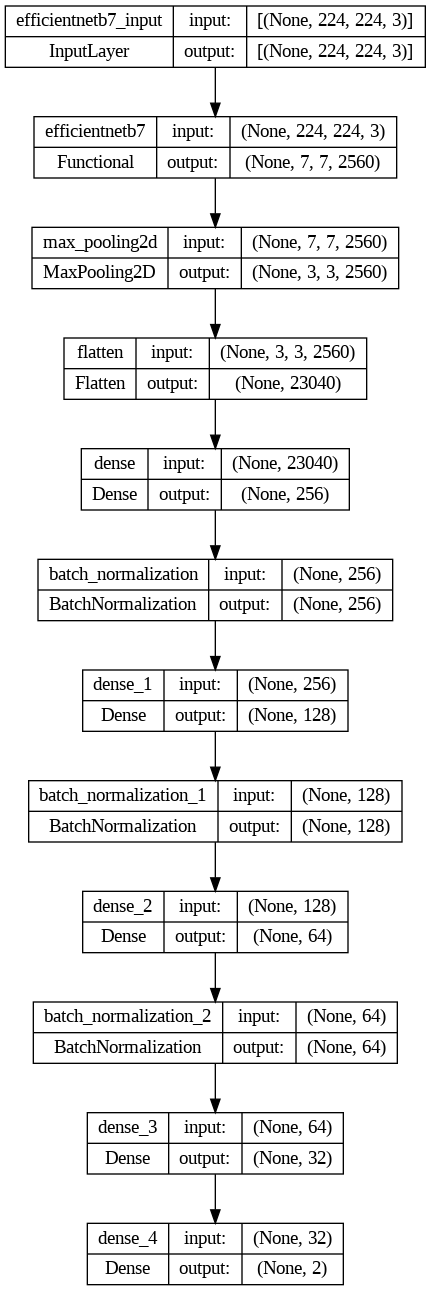

In [ ]:
from tensorflow.keras.utils import plot_model
from IPython.display import Image
plot_model(model, to_file='convnet.png', show_shapes=True,show_layer_names=True)
Image(filename='convnet.png')

In [ ]:
from keras.callbacks import ModelCheckpoint

epochs = 150
batch_size = 4

checkpoint_path = "cad_classification_checkpoint"
checkpointer = ModelCheckpoint(checkpoint_path,
                               monitor="val_accuracy",
                               save_best_only=True,
                               save_weights_only=False)

history = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator) // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=len(validation_generator) // batch_size,
    callbacks=[checkpointer]
)

Epoch 1/150
36/36 [==============================] - ETA: 0s - loss: 0.7815 - acc: 0.6007

36/36 [==============================] - 173s 1s/step - loss: 0.7815 - acc: 0.6007 - val_loss: 0.3754 - val_acc: 1.0000
Epoch 2/150
36/36 [==============================] - ETA: 0s - loss: 0.6562 - acc: 0.6641

36/36 [==============================] - 39s 1s/step - loss: 0.6562 - acc: 0.6641 - val_loss: 0.2349 - val_acc: 1.0000
Epoch 3/150
36/36 [==============================] - ETA: 0s - loss: 0.6172 - acc: 0.6667

36/36 [==============================] - 39s 1s/step - loss: 0.6172 - acc: 0.6667 - val_loss: 0.2821 - val_acc: 1.0000
Epoch 4/150
36/36 [==============================] - ETA: 0s - loss: 0.5601 - acc: 0.7092

36/36 [==============================] - 39s 1s/step - loss: 0.5601 - acc: 0.7092 - val_loss: 0.3190 - val_acc: 1.0000
Epoch 5/150
36/36 [==============================] - ETA: 0s - loss: 0.5454 - acc: 0.7291

36/36 [==============================] - 40s 1s/step - loss: 0.5454 - acc: 0.7291 - val_loss: 0.2098 - val_acc: 1.0000
Epoch 6/150
36/36 [==============================] - ETA: 0s - loss: 0.4940 - acc: 0.7500

36/36 [==============================] - 40s 1s/step - loss: 0.4940 - acc: 0.7500 - val_loss: 0.2207 - val_acc: 1.0000
Epoch 7/150
36/36 [==============================] - ETA: 0s - loss: 0.4972 - acc: 0.7474

36/36 [==============================] - 40s 1s/step - loss: 0.4972 - acc: 0.7474 - val_loss: 0.3025 - val_acc: 1.0000
Epoch 8/150
36/36 [==============================] - ETA: 0s - loss: 0.4743 - acc: 0.7526

36/36 [==============================] - 40s 1s/step - loss: 0.4743 - acc: 0.7526 - val_loss: 0.3434 - val_acc: 0.9688
Epoch 9/150
36/36 [==============================] - ETA: 0s - loss: 0.4826 - acc: 0.7587

36/36 [==============================] - 40s 1s/step - loss: 0.4826 - acc: 0.7587 - val_loss: 0.4115 - val_acc: 1.0000
Epoch 10/150
36/36 [==============================] - ETA: 0s - loss: 0.4335 - acc: 0.7831

36/36 [==============================] - 40s 1s/step - loss: 0.4335 - acc: 0.7831 - val_loss: 0.3098 - val_acc: 1.0000
Epoch 11/150
36/36 [==============================] - ETA: 0s - loss: 0.4396 - acc: 0.7812

36/36 [==============================] - 40s 1s/step - loss: 0.4396 - acc: 0.7812 - val_loss: 0.2814 - val_acc: 1.0000
Epoch 12/150
36/36 [==============================] - ETA: 0s - loss: 0.4185 - acc: 0.7795

36/36 [==============================] - 40s 1s/step - loss: 0.4185 - acc: 0.7795 - val_loss: 0.3925 - val_acc: 0.8438
Epoch 13/150
36/36 [==============================] - ETA: 0s - loss: 0.4003 - acc: 0.7977

36/36 [==============================] - 40s 1s/step - loss: 0.4003 - acc: 0.7977 - val_loss: 0.2753 - val_acc: 0.9375
Epoch 14/150
36/36 [==============================] - ETA: 0s - loss: 0.3875 - acc: 0.8066

36/36 [==============================] - 40s 1s/step - loss: 0.3875 - acc: 0.8066 - val_loss: 0.2125 - val_acc: 0.9375
Epoch 15/150
36/36 [==============================] - ETA: 0s - loss: 0.3988 - acc: 0.7986

36/36 [==============================] - 40s 1s/step - loss: 0.3988 - acc: 0.7986 - val_loss: 0.3969 - val_acc: 0.8125
Epoch 16/150
36/36 [==============================] - ETA: 0s - loss: 0.3803 - acc: 0.8108

36/36 [==============================] - 40s 1s/step - loss: 0.3803 - acc: 0.8108 - val_loss: 0.1968 - val_acc: 0.9688
Epoch 17/150
36/36 [==============================] - ETA: 0s - loss: 0.4033 - acc: 0.8040

36/36 [==============================] - 40s 1s/step - loss: 0.4033 - acc: 0.8040 - val_loss: 0.1880 - val_acc: 0.9688
Epoch 18/150
36/36 [==============================] - ETA: 0s - loss: 0.3840 - acc: 0.8142

36/36 [==============================] - 40s 1s/step - loss: 0.3840 - acc: 0.8142 - val_loss: 0.4796 - val_acc: 0.6875
Epoch 19/150
36/36 [==============================] - ETA: 0s - loss: 0.3379 - acc: 0.8351

36/36 [==============================] - 40s 1s/step - loss: 0.3379 - acc: 0.8351 - val_loss: 0.3885 - val_acc: 0.8125
Epoch 20/150
36/36 [==============================] - ETA: 0s - loss: 0.3460 - acc: 0.8310

36/36 [==============================] - 40s 1s/step - loss: 0.3460 - acc: 0.8310 - val_loss: 0.7484 - val_acc: 0.6250
Epoch 21/150
36/36 [==============================] - ETA: 0s - loss: 0.3710 - acc: 0.8142

36/36 [==============================] - 40s 1s/step - loss: 0.3710 - acc: 0.8142 - val_loss: 0.4799 - val_acc: 0.7188
Epoch 22/150
36/36 [==============================] - ETA: 0s - loss: 0.3244 - acc: 0.8397

36/36 [==============================] - 40s 1s/step - loss: 0.3244 - acc: 0.8397 - val_loss: 0.4227 - val_acc: 0.8750
Epoch 23/150
36/36 [==============================] - ETA: 0s - loss: 0.3182 - acc: 0.8472

36/36 [==============================] - 41s 1s/step - loss: 0.3182 - acc: 0.8472 - val_loss: 0.4012 - val_acc: 0.8125
Epoch 24/150
36/36 [==============================] - ETA: 0s - loss: 0.3161 - acc: 0.8498

36/36 [==============================] - 40s 1s/step - loss: 0.3161 - acc: 0.8498 - val_loss: 0.4255 - val_acc: 0.7500
Epoch 25/150
36/36 [==============================] - ETA: 0s - loss: 0.3077 - acc: 0.8576

36/36 [==============================] - 40s 1s/step - loss: 0.3077 - acc: 0.8576 - val_loss: 0.4960 - val_acc: 0.8125
Epoch 26/150
36/36 [==============================] - ETA: 0s - loss: 0.3142 - acc: 0.8429

36/36 [==============================] - 40s 1s/step - loss: 0.3142 - acc: 0.8429 - val_loss: 0.4098 - val_acc: 0.7812
Epoch 27/150
36/36 [==============================] - ETA: 0s - loss: 0.2975 - acc: 0.8620

36/36 [==============================] - 40s 1s/step - loss: 0.2975 - acc: 0.8620 - val_loss: 0.7191 - val_acc: 0.5000
Epoch 28/150
36/36 [==============================] - ETA: 0s - loss: 0.2955 - acc: 0.8611

36/36 [==============================] - 40s 1s/step - loss: 0.2955 - acc: 0.8611 - val_loss: 0.7149 - val_acc: 0.5312
Epoch 29/150
36/36 [==============================] - ETA: 0s - loss: 0.2848 - acc: 0.8550

36/36 [==============================] - 40s 1s/step - loss: 0.2848 - acc: 0.8550 - val_loss: 0.4977 - val_acc: 0.8125
Epoch 30/150
36/36 [==============================] - ETA: 0s - loss: 0.2858 - acc: 0.8576

36/36 [==============================] - 40s 1s/step - loss: 0.2858 - acc: 0.8576 - val_loss: 0.3619 - val_acc: 0.7812
Epoch 31/150
36/36 [==============================] - ETA: 0s - loss: 0.2908 - acc: 0.8602

36/36 [==============================] - 40s 1s/step - loss: 0.2908 - acc: 0.8602 - val_loss: 0.5894 - val_acc: 0.6875
Epoch 32/150
36/36 [==============================] - ETA: 0s - loss: 0.2801 - acc: 0.8693

36/36 [==============================] - 40s 1s/step - loss: 0.2801 - acc: 0.8693 - val_loss: 0.4620 - val_acc: 0.7500
Epoch 33/150
36/36 [==============================] - ETA: 0s - loss: 0.2766 - acc: 0.8759

36/36 [==============================] - 40s 1s/step - loss: 0.2766 - acc: 0.8759 - val_loss: 0.6089 - val_acc: 0.7500
Epoch 34/150
36/36 [==============================] - ETA: 0s - loss: 0.2563 - acc: 0.8906

36/36 [==============================] - 40s 1s/step - loss: 0.2563 - acc: 0.8906 - val_loss: 0.1669 - val_acc: 0.8750
Epoch 35/150
36/36 [==============================] - ETA: 0s - loss: 0.2691 - acc: 0.8767

36/36 [==============================] - 40s 1s/step - loss: 0.2691 - acc: 0.8767 - val_loss: 0.2928 - val_acc: 0.8750
Epoch 36/150
36/36 [==============================] - ETA: 0s - loss: 0.2462 - acc: 0.8946

36/36 [==============================] - 40s 1s/step - loss: 0.2462 - acc: 0.8946 - val_loss: 0.3672 - val_acc: 0.8125
Epoch 37/150
36/36 [==============================] - ETA: 0s - loss: 0.2700 - acc: 0.8793

36/36 [==============================] - 40s 1s/step - loss: 0.2700 - acc: 0.8793 - val_loss: 0.5141 - val_acc: 0.7500
Epoch 38/150
36/36 [==============================] - ETA: 0s - loss: 0.2520 - acc: 0.8854

36/36 [==============================] - 40s 1s/step - loss: 0.2520 - acc: 0.8854 - val_loss: 0.6911 - val_acc: 0.6875
Epoch 39/150
36/36 [==============================] - ETA: 0s - loss: 0.2407 - acc: 0.8868

36/36 [==============================] - 40s 1s/step - loss: 0.2407 - acc: 0.8868 - val_loss: 0.3287 - val_acc: 0.8750
Epoch 40/150
36/36 [==============================] - ETA: 0s - loss: 0.2376 - acc: 0.8898

36/36 [==============================] - 40s 1s/step - loss: 0.2376 - acc: 0.8898 - val_loss: 0.3936 - val_acc: 0.8125
Epoch 41/150
36/36 [==============================] - ETA: 0s - loss: 0.2141 - acc: 0.9054

36/36 [==============================] - 40s 1s/step - loss: 0.2141 - acc: 0.9054 - val_loss: 0.3231 - val_acc: 0.8438
Epoch 42/150
36/36 [==============================] - ETA: 0s - loss: 0.2388 - acc: 0.8898

36/36 [==============================] - 40s 1s/step - loss: 0.2388 - acc: 0.8898 - val_loss: 0.2794 - val_acc: 0.8750
Epoch 43/150
36/36 [==============================] - ETA: 0s - loss: 0.2320 - acc: 0.8967

36/36 [==============================] - 40s 1s/step - loss: 0.2320 - acc: 0.8967 - val_loss: 0.6125 - val_acc: 0.7500
Epoch 44/150
36/36 [==============================] - ETA: 0s - loss: 0.2472 - acc: 0.8872

36/36 [==============================] - 40s 1s/step - loss: 0.2472 - acc: 0.8872 - val_loss: 0.3198 - val_acc: 0.9062
Epoch 45/150
36/36 [==============================] - ETA: 0s - loss: 0.2222 - acc: 0.8946

36/36 [==============================] - 40s 1s/step - loss: 0.2222 - acc: 0.8946 - val_loss: 0.4019 - val_acc: 0.8438
Epoch 46/150
36/36 [==============================] - ETA: 0s - loss: 0.2122 - acc: 0.9002

36/36 [==============================] - 40s 1s/step - loss: 0.2122 - acc: 0.9002 - val_loss: 0.4018 - val_acc: 0.7812
Epoch 47/150
36/36 [==============================] - ETA: 0s - loss: 0.2230 - acc: 0.9002

36/36 [==============================] - 40s 1s/step - loss: 0.2230 - acc: 0.9002 - val_loss: 0.3780 - val_acc: 0.8438
Epoch 48/150
36/36 [==============================] - ETA: 0s - loss: 0.1923 - acc: 0.9181

36/36 [==============================] - 40s 1s/step - loss: 0.1923 - acc: 0.9181 - val_loss: 0.3456 - val_acc: 0.8125
Epoch 49/150
36/36 [==============================] - ETA: 0s - loss: 0.2196 - acc: 0.9089

36/36 [==============================] - 40s 1s/step - loss: 0.2196 - acc: 0.9089 - val_loss: 0.3983 - val_acc: 0.7812
Epoch 50/150
36/36 [==============================] - ETA: 0s - loss: 0.1892 - acc: 0.9219

36/36 [==============================] - 40s 1s/step - loss: 0.1892 - acc: 0.9219 - val_loss: 0.9815 - val_acc: 0.5000
Epoch 51/150
36/36 [==============================] - ETA: 0s - loss: 0.1987 - acc: 0.9080

36/36 [==============================] - 40s 1s/step - loss: 0.1987 - acc: 0.9080 - val_loss: 0.5658 - val_acc: 0.7188
Epoch 52/150
36/36 [==============================] - ETA: 0s - loss: 0.1736 - acc: 0.9245

36/36 [==============================] - 40s 1s/step - loss: 0.1736 - acc: 0.9245 - val_loss: 0.4748 - val_acc: 0.8125
Epoch 53/150
36/36 [==============================] - ETA: 0s - loss: 0.2072 - acc: 0.9019

36/36 [==============================] - 40s 1s/step - loss: 0.2072 - acc: 0.9019 - val_loss: 0.3702 - val_acc: 0.8125
Epoch 54/150
36/36 [==============================] - ETA: 0s - loss: 0.1903 - acc: 0.9245

36/36 [==============================] - 40s 1s/step - loss: 0.1903 - acc: 0.9245 - val_loss: 0.6003 - val_acc: 0.7188
Epoch 55/150
36/36 [==============================] - ETA: 0s - loss: 0.1674 - acc: 0.9349

36/36 [==============================] - 40s 1s/step - loss: 0.1674 - acc: 0.9349 - val_loss: 0.2435 - val_acc: 0.9375
Epoch 56/150
36/36 [==============================] - ETA: 0s - loss: 0.1761 - acc: 0.9306

36/36 [==============================] - 40s 1s/step - loss: 0.1761 - acc: 0.9306 - val_loss: 0.3436 - val_acc: 0.8438
Epoch 57/150
36/36 [==============================] - ETA: 0s - loss: 0.1862 - acc: 0.9245

36/36 [==============================] - 40s 1s/step - loss: 0.1862 - acc: 0.9245 - val_loss: 0.3992 - val_acc: 0.7500
Epoch 58/150
36/36 [==============================] - ETA: 0s - loss: 0.1843 - acc: 0.9260

36/36 [==============================] - 40s 1s/step - loss: 0.1843 - acc: 0.9260 - val_loss: 0.3220 - val_acc: 0.8750
Epoch 59/150
36/36 [==============================] - ETA: 0s - loss: 0.1758 - acc: 0.9184

36/36 [==============================] - 40s 1s/step - loss: 0.1758 - acc: 0.9184 - val_loss: 0.1885 - val_acc: 0.9375
Epoch 60/150
36/36 [==============================] - ETA: 0s - loss: 0.1669 - acc: 0.9253

36/36 [==============================] - 40s 1s/step - loss: 0.1669 - acc: 0.9253 - val_loss: 0.4342 - val_acc: 0.7500
Epoch 61/150
36/36 [==============================] - ETA: 0s - loss: 0.1181 - acc: 0.9557

36/36 [==============================] - 41s 1s/step - loss: 0.1181 - acc: 0.9557 - val_loss: 0.4666 - val_acc: 0.8438
Epoch 62/150
36/36 [==============================] - ETA: 0s - loss: 0.1410 - acc: 0.9375

36/36 [==============================] - 40s 1s/step - loss: 0.1410 - acc: 0.9375 - val_loss: 0.4922 - val_acc: 0.8438
Epoch 63/150
36/36 [==============================] - ETA: 0s - loss: 0.1345 - acc: 0.9470

36/36 [==============================] - 40s 1s/step - loss: 0.1345 - acc: 0.9470 - val_loss: 0.2037 - val_acc: 0.9062
Epoch 64/150
36/36 [==============================] - ETA: 0s - loss: 0.1590 - acc: 0.9384

36/36 [==============================] - 40s 1s/step - loss: 0.1590 - acc: 0.9384 - val_loss: 0.2498 - val_acc: 0.8750
Epoch 65/150
36/36 [==============================] - ETA: 0s - loss: 0.1349 - acc: 0.9514

36/36 [==============================] - 40s 1s/step - loss: 0.1349 - acc: 0.9514 - val_loss: 0.4905 - val_acc: 0.7500
Epoch 66/150
36/36 [==============================] - ETA: 0s - loss: 0.1302 - acc: 0.9470

36/36 [==============================] - 40s 1s/step - loss: 0.1302 - acc: 0.9470 - val_loss: 0.2472 - val_acc: 0.8750
Epoch 67/150
36/36 [==============================] - ETA: 0s - loss: 0.1192 - acc: 0.9592

36/36 [==============================] - 40s 1s/step - loss: 0.1192 - acc: 0.9592 - val_loss: 0.1811 - val_acc: 0.9062
Epoch 68/150
36/36 [==============================] - ETA: 0s - loss: 0.1342 - acc: 0.9497

36/36 [==============================] - 40s 1s/step - loss: 0.1342 - acc: 0.9497 - val_loss: 0.1398 - val_acc: 0.9062
Epoch 69/150
36/36 [==============================] - ETA: 0s - loss: 0.1381 - acc: 0.9434

36/36 [==============================] - 40s 1s/step - loss: 0.1381 - acc: 0.9434 - val_loss: 0.3948 - val_acc: 0.7812
Epoch 70/150
36/36 [==============================] - ETA: 0s - loss: 0.1317 - acc: 0.9451

36/36 [==============================] - 40s 1s/step - loss: 0.1317 - acc: 0.9451 - val_loss: 0.3956 - val_acc: 0.7812
Epoch 71/150
36/36 [==============================] - ETA: 0s - loss: 0.1094 - acc: 0.9592

36/36 [==============================] - 40s 1s/step - loss: 0.1094 - acc: 0.9592 - val_loss: 0.3827 - val_acc: 0.8125
Epoch 72/150
36/36 [==============================] - ETA: 0s - loss: 0.1220 - acc: 0.9566

36/36 [==============================] - 40s 1s/step - loss: 0.1220 - acc: 0.9566 - val_loss: 0.5302 - val_acc: 0.7188
Epoch 73/150
36/36 [==============================] - ETA: 0s - loss: 0.1168 - acc: 0.9505

36/36 [==============================] - 40s 1s/step - loss: 0.1168 - acc: 0.9505 - val_loss: 0.1572 - val_acc: 0.9375
Epoch 74/150
36/36 [==============================] - ETA: 0s - loss: 0.1206 - acc: 0.9557

36/36 [==============================] - 40s 1s/step - loss: 0.1206 - acc: 0.9557 - val_loss: 0.5485 - val_acc: 0.7812
Epoch 75/150
36/36 [==============================] - ETA: 0s - loss: 0.1125 - acc: 0.9635

36/36 [==============================] - 40s 1s/step - loss: 0.1125 - acc: 0.9635 - val_loss: 0.3442 - val_acc: 0.8438
Epoch 76/150
36/36 [==============================] - ETA: 0s - loss: 0.1184 - acc: 0.9575

36/36 [==============================] - 40s 1s/step - loss: 0.1184 - acc: 0.9575 - val_loss: 0.5035 - val_acc: 0.7188
Epoch 77/150
36/36 [==============================] - ETA: 0s - loss: 0.1104 - acc: 0.9540

36/36 [==============================] - 40s 1s/step - loss: 0.1104 - acc: 0.9540 - val_loss: 0.4935 - val_acc: 0.7500
Epoch 78/150
36/36 [==============================] - ETA: 0s - loss: 0.1270 - acc: 0.9538

36/36 [==============================] - 40s 1s/step - loss: 0.1270 - acc: 0.9538 - val_loss: 0.3889 - val_acc: 0.8125
Epoch 79/150
36/36 [==============================] - ETA: 0s - loss: 0.1143 - acc: 0.9540

36/36 [==============================] - 40s 1s/step - loss: 0.1143 - acc: 0.9540 - val_loss: 0.4045 - val_acc: 0.8438
Epoch 80/150
36/36 [==============================] - ETA: 0s - loss: 0.0955 - acc: 0.9575

36/36 [==============================] - 40s 1s/step - loss: 0.0955 - acc: 0.9575 - val_loss: 0.4556 - val_acc: 0.7812
Epoch 81/150
36/36 [==============================] - ETA: 0s - loss: 0.1214 - acc: 0.9601

36/36 [==============================] - 40s 1s/step - loss: 0.1214 - acc: 0.9601 - val_loss: 0.3676 - val_acc: 0.8125
Epoch 82/150
36/36 [==============================] - ETA: 0s - loss: 0.0880 - acc: 0.9644

36/36 [==============================] - 40s 1s/step - loss: 0.0880 - acc: 0.9644 - val_loss: 0.6117 - val_acc: 0.7812
Epoch 83/150
36/36 [==============================] - ETA: 0s - loss: 0.0861 - acc: 0.9679

36/36 [==============================] - 40s 1s/step - loss: 0.0861 - acc: 0.9679 - val_loss: 0.6446 - val_acc: 0.7188
Epoch 84/150
36/36 [==============================] - ETA: 0s - loss: 0.0900 - acc: 0.9644

36/36 [==============================] - 40s 1s/step - loss: 0.0900 - acc: 0.9644 - val_loss: 0.7178 - val_acc: 0.7188
Epoch 85/150
36/36 [==============================] - ETA: 0s - loss: 0.0897 - acc: 0.9670

36/36 [==============================] - 40s 1s/step - loss: 0.0897 - acc: 0.9670 - val_loss: 0.6079 - val_acc: 0.7188
Epoch 86/150
36/36 [==============================] - ETA: 0s - loss: 0.0931 - acc: 0.9644

36/36 [==============================] - 40s 1s/step - loss: 0.0931 - acc: 0.9644 - val_loss: 0.3021 - val_acc: 0.8750
Epoch 87/150
36/36 [==============================] - ETA: 0s - loss: 0.0867 - acc: 0.9688

36/36 [==============================] - 40s 1s/step - loss: 0.0867 - acc: 0.9688 - val_loss: 0.2879 - val_acc: 0.9375
Epoch 88/150
36/36 [==============================] - ETA: 0s - loss: 0.0972 - acc: 0.9635

36/36 [==============================] - 40s 1s/step - loss: 0.0972 - acc: 0.9635 - val_loss: 0.6747 - val_acc: 0.7188
Epoch 89/150
36/36 [==============================] - ETA: 0s - loss: 0.0918 - acc: 0.9686

36/36 [==============================] - 40s 1s/step - loss: 0.0918 - acc: 0.9686 - val_loss: 0.7430 - val_acc: 0.7188
Epoch 90/150
36/36 [==============================] - ETA: 0s - loss: 0.0909 - acc: 0.9670

36/36 [==============================] - 40s 1s/step - loss: 0.0909 - acc: 0.9670 - val_loss: 0.5518 - val_acc: 0.7188
Epoch 91/150
36/36 [==============================] - ETA: 0s - loss: 0.0812 - acc: 0.9686

36/36 [==============================] - 40s 1s/step - loss: 0.0812 - acc: 0.9686 - val_loss: 0.4571 - val_acc: 0.7188
Epoch 92/150
36/36 [==============================] - ETA: 0s - loss: 0.0698 - acc: 0.9757

36/36 [==============================] - 40s 1s/step - loss: 0.0698 - acc: 0.9757 - val_loss: 0.3064 - val_acc: 0.7812
Epoch 93/150
36/36 [==============================] - ETA: 0s - loss: 0.0646 - acc: 0.9748

36/36 [==============================] - 40s 1s/step - loss: 0.0646 - acc: 0.9748 - val_loss: 0.3180 - val_acc: 0.8750
Epoch 94/150
36/36 [==============================] - ETA: 0s - loss: 0.0909 - acc: 0.9661

36/36 [==============================] - 40s 1s/step - loss: 0.0909 - acc: 0.9661 - val_loss: 0.1328 - val_acc: 0.9375
Epoch 95/150
36/36 [==============================] - ETA: 0s - loss: 0.0645 - acc: 0.9783

36/36 [==============================] - 40s 1s/step - loss: 0.0645 - acc: 0.9783 - val_loss: 0.3703 - val_acc: 0.8125
Epoch 96/150
36/36 [==============================] - ETA: 0s - loss: 0.0755 - acc: 0.9731

36/36 [==============================] - 40s 1s/step - loss: 0.0755 - acc: 0.9731 - val_loss: 0.2967 - val_acc: 0.8438
Epoch 97/150
36/36 [==============================] - ETA: 0s - loss: 0.0647 - acc: 0.9748

36/36 [==============================] - 40s 1s/step - loss: 0.0647 - acc: 0.9748 - val_loss: 0.2276 - val_acc: 0.9062
Epoch 98/150
36/36 [==============================] - ETA: 0s - loss: 0.0662 - acc: 0.9748

36/36 [==============================] - 40s 1s/step - loss: 0.0662 - acc: 0.9748 - val_loss: 0.3438 - val_acc: 0.9062
Epoch 99/150
36/36 [==============================] - ETA: 0s - loss: 0.0928 - acc: 0.9679

36/36 [==============================] - 40s 1s/step - loss: 0.0928 - acc: 0.9679 - val_loss: 0.2311 - val_acc: 0.8750
Epoch 100/150
36/36 [==============================] - ETA: 0s - loss: 0.0651 - acc: 0.9747

36/36 [==============================] - 40s 1s/step - loss: 0.0651 - acc: 0.9747 - val_loss: 0.4880 - val_acc: 0.7500
Epoch 101/150
36/36 [==============================] - ETA: 0s - loss: 0.0626 - acc: 0.9766

36/36 [==============================] - 40s 1s/step - loss: 0.0626 - acc: 0.9766 - val_loss: 0.8345 - val_acc: 0.7188
Epoch 102/150
36/36 [==============================] - ETA: 0s - loss: 0.0624 - acc: 0.9740

36/36 [==============================] - 40s 1s/step - loss: 0.0624 - acc: 0.9740 - val_loss: 0.3386 - val_acc: 0.8750
Epoch 103/150
36/36 [==============================] - ETA: 0s - loss: 0.0322 - acc: 0.9878

36/36 [==============================] - 40s 1s/step - loss: 0.0322 - acc: 0.9878 - val_loss: 0.3943 - val_acc: 0.8125
Epoch 104/150
36/36 [==============================] - ETA: 0s - loss: 0.0708 - acc: 0.9713

36/36 [==============================] - 40s 1s/step - loss: 0.0708 - acc: 0.9713 - val_loss: 0.5304 - val_acc: 0.7812
Epoch 105/150
36/36 [==============================] - ETA: 0s - loss: 0.0644 - acc: 0.9766

36/36 [==============================] - 40s 1s/step - loss: 0.0644 - acc: 0.9766 - val_loss: 0.2425 - val_acc: 0.9375
Epoch 106/150
36/36 [==============================] - ETA: 0s - loss: 0.0583 - acc: 0.9731

36/36 [==============================] - 40s 1s/step - loss: 0.0583 - acc: 0.9731 - val_loss: 0.3601 - val_acc: 0.8750
Epoch 107/150
36/36 [==============================] - ETA: 0s - loss: 0.0500 - acc: 0.9792

36/36 [==============================] - 40s 1s/step - loss: 0.0500 - acc: 0.9792 - val_loss: 0.6674 - val_acc: 0.8125
Epoch 108/150
36/36 [==============================] - ETA: 0s - loss: 0.0515 - acc: 0.9826

36/36 [==============================] - 40s 1s/step - loss: 0.0515 - acc: 0.9826 - val_loss: 0.5111 - val_acc: 0.8750
Epoch 109/150
36/36 [==============================] - ETA: 0s - loss: 0.0399 - acc: 0.9869

36/36 [==============================] - 40s 1s/step - loss: 0.0399 - acc: 0.9869 - val_loss: 0.4765 - val_acc: 0.8125
Epoch 110/150
36/36 [==============================] - ETA: 0s - loss: 0.0675 - acc: 0.9800

36/36 [==============================] - 40s 1s/step - loss: 0.0675 - acc: 0.9800 - val_loss: 0.6372 - val_acc: 0.8438
Epoch 111/150
36/36 [==============================] - ETA: 0s - loss: 0.0598 - acc: 0.9835

36/36 [==============================] - 40s 1s/step - loss: 0.0598 - acc: 0.9835 - val_loss: 0.3781 - val_acc: 0.9062
Epoch 112/150
36/36 [==============================] - ETA: 0s - loss: 0.0654 - acc: 0.9783

36/36 [==============================] - 40s 1s/step - loss: 0.0654 - acc: 0.9783 - val_loss: 0.3788 - val_acc: 0.8750
Epoch 113/150
36/36 [==============================] - ETA: 0s - loss: 0.0518 - acc: 0.9783

36/36 [==============================] - 41s 1s/step - loss: 0.0518 - acc: 0.9783 - val_loss: 0.2615 - val_acc: 0.8750
Epoch 114/150
36/36 [==============================] - ETA: 0s - loss: 0.0462 - acc: 0.9844

36/36 [==============================] - 40s 1s/step - loss: 0.0462 - acc: 0.9844 - val_loss: 0.3165 - val_acc: 0.8438
Epoch 115/150
36/36 [==============================] - ETA: 0s - loss: 0.0579 - acc: 0.9757

36/36 [==============================] - 40s 1s/step - loss: 0.0579 - acc: 0.9757 - val_loss: 0.5096 - val_acc: 0.8438
Epoch 116/150
36/36 [==============================] - ETA: 0s - loss: 0.0587 - acc: 0.9783

36/36 [==============================] - 40s 1s/step - loss: 0.0587 - acc: 0.9783 - val_loss: 0.3961 - val_acc: 0.8750
Epoch 117/150
36/36 [==============================] - ETA: 0s - loss: 0.0535 - acc: 0.9817

36/36 [==============================] - 40s 1s/step - loss: 0.0535 - acc: 0.9817 - val_loss: 0.4153 - val_acc: 0.8125
Epoch 118/150
36/36 [==============================] - ETA: 0s - loss: 0.0718 - acc: 0.9809

36/36 [==============================] - 40s 1s/step - loss: 0.0718 - acc: 0.9809 - val_loss: 0.4458 - val_acc: 0.8750
Epoch 119/150
36/36 [==============================] - ETA: 0s - loss: 0.0424 - acc: 0.9844

36/36 [==============================] - 40s 1s/step - loss: 0.0424 - acc: 0.9844 - val_loss: 0.3257 - val_acc: 0.8750
Epoch 120/150
36/36 [==============================] - ETA: 0s - loss: 0.0419 - acc: 0.9844

36/36 [==============================] - 40s 1s/step - loss: 0.0419 - acc: 0.9844 - val_loss: 0.3008 - val_acc: 0.8750
Epoch 121/150
36/36 [==============================] - ETA: 0s - loss: 0.0749 - acc: 0.9740

36/36 [==============================] - 40s 1s/step - loss: 0.0749 - acc: 0.9740 - val_loss: 0.2964 - val_acc: 0.8750
Epoch 122/150
36/36 [==============================] - ETA: 0s - loss: 0.0462 - acc: 0.9870

36/36 [==============================] - 40s 1s/step - loss: 0.0462 - acc: 0.9870 - val_loss: 0.5954 - val_acc: 0.7812
Epoch 123/150
36/36 [==============================] - ETA: 0s - loss: 0.0652 - acc: 0.9765

36/36 [==============================] - 40s 1s/step - loss: 0.0652 - acc: 0.9765 - val_loss: 0.3133 - val_acc: 0.8438
Epoch 124/150
36/36 [==============================] - ETA: 0s - loss: 0.0447 - acc: 0.9835

36/36 [==============================] - 40s 1s/step - loss: 0.0447 - acc: 0.9835 - val_loss: 0.3029 - val_acc: 0.8750
Epoch 125/150
36/36 [==============================] - ETA: 0s - loss: 0.0506 - acc: 0.9800

36/36 [==============================] - 40s 1s/step - loss: 0.0506 - acc: 0.9800 - val_loss: 0.3378 - val_acc: 0.8750
Epoch 126/150
36/36 [==============================] - ETA: 0s - loss: 0.0531 - acc: 0.9808

36/36 [==============================] - 40s 1s/step - loss: 0.0531 - acc: 0.9808 - val_loss: 0.7850 - val_acc: 0.7500
Epoch 127/150
36/36 [==============================] - ETA: 0s - loss: 0.0523 - acc: 0.9869

36/36 [==============================] - 40s 1s/step - loss: 0.0523 - acc: 0.9869 - val_loss: 0.3755 - val_acc: 0.8125
Epoch 128/150
36/36 [==============================] - ETA: 0s - loss: 0.0642 - acc: 0.9774

36/36 [==============================] - 40s 1s/step - loss: 0.0642 - acc: 0.9774 - val_loss: 0.3555 - val_acc: 0.8438
Epoch 129/150
36/36 [==============================] - ETA: 0s - loss: 0.0608 - acc: 0.9800

36/36 [==============================] - 40s 1s/step - loss: 0.0608 - acc: 0.9800 - val_loss: 0.3690 - val_acc: 0.8438
Epoch 130/150
36/36 [==============================] - ETA: 0s - loss: 0.0427 - acc: 0.9905

36/36 [==============================] - 40s 1s/step - loss: 0.0427 - acc: 0.9905 - val_loss: 0.3852 - val_acc: 0.8125
Epoch 131/150
36/36 [==============================] - ETA: 0s - loss: 0.0406 - acc: 0.9835

36/36 [==============================] - 40s 1s/step - loss: 0.0406 - acc: 0.9835 - val_loss: 0.5558 - val_acc: 0.8438
Epoch 132/150
36/36 [==============================] - ETA: 0s - loss: 0.0383 - acc: 0.9922

36/36 [==============================] - 40s 1s/step - loss: 0.0383 - acc: 0.9922 - val_loss: 0.1686 - val_acc: 0.9062
Epoch 133/150
36/36 [==============================] - ETA: 0s - loss: 0.0598 - acc: 0.9800

36/36 [==============================] - 41s 1s/step - loss: 0.0598 - acc: 0.9800 - val_loss: 0.3852 - val_acc: 0.7812
Epoch 134/150
36/36 [==============================] - ETA: 0s - loss: 0.0598 - acc: 0.9766

36/36 [==============================] - 39s 1s/step - loss: 0.0598 - acc: 0.9766 - val_loss: 0.5281 - val_acc: 0.8438
Epoch 135/150
36/36 [==============================] - ETA: 0s - loss: 0.0498 - acc: 0.9826

36/36 [==============================] - 40s 1s/step - loss: 0.0498 - acc: 0.9826 - val_loss: 0.2341 - val_acc: 0.9062
Epoch 136/150
36/36 [==============================] - ETA: 0s - loss: 0.0405 - acc: 0.9852

36/36 [==============================] - 40s 1s/step - loss: 0.0405 - acc: 0.9852 - val_loss: 0.1232 - val_acc: 0.9375
Epoch 137/150
36/36 [==============================] - ETA: 0s - loss: 0.0526 - acc: 0.9835

36/36 [==============================] - 40s 1s/step - loss: 0.0526 - acc: 0.9835 - val_loss: 0.0745 - val_acc: 0.9688
Epoch 138/150
36/36 [==============================] - ETA: 0s - loss: 0.0535 - acc: 0.9792

36/36 [==============================] - 40s 1s/step - loss: 0.0535 - acc: 0.9792 - val_loss: 0.2639 - val_acc: 0.8750
Epoch 139/150
36/36 [==============================] - ETA: 0s - loss: 0.0458 - acc: 0.9818

36/36 [==============================] - 40s 1s/step - loss: 0.0458 - acc: 0.9818 - val_loss: 0.4522 - val_acc: 0.8125
Epoch 140/150
36/36 [==============================] - ETA: 0s - loss: 0.0572 - acc: 0.9826

36/36 [==============================] - 40s 1s/step - loss: 0.0572 - acc: 0.9826 - val_loss: 0.4368 - val_acc: 0.8750
Epoch 141/150
36/36 [==============================] - ETA: 0s - loss: 0.0378 - acc: 0.9887

36/36 [==============================] - 40s 1s/step - loss: 0.0378 - acc: 0.9887 - val_loss: 0.4007 - val_acc: 0.9375
Epoch 142/150
36/36 [==============================] - ETA: 0s - loss: 0.0399 - acc: 0.9852

36/36 [==============================] - 40s 1s/step - loss: 0.0399 - acc: 0.9852 - val_loss: 0.4163 - val_acc: 0.9062
Epoch 143/150
36/36 [==============================] - ETA: 0s - loss: 0.0512 - acc: 0.9791

36/36 [==============================] - 40s 1s/step - loss: 0.0512 - acc: 0.9791 - val_loss: 0.2207 - val_acc: 0.9062
Epoch 144/150
36/36 [==============================] - ETA: 0s - loss: 0.0344 - acc: 0.9878

36/36 [==============================] - 40s 1s/step - loss: 0.0344 - acc: 0.9878 - val_loss: 0.2891 - val_acc: 0.9062
Epoch 145/150
36/36 [==============================] - ETA: 0s - loss: 0.0334 - acc: 0.9905

36/36 [==============================] - 41s 1s/step - loss: 0.0334 - acc: 0.9905 - val_loss: 0.1492 - val_acc: 0.9375
Epoch 146/150
36/36 [==============================] - ETA: 0s - loss: 0.0310 - acc: 0.9896

36/36 [==============================] - 40s 1s/step - loss: 0.0310 - acc: 0.9896 - val_loss: 0.2710 - val_acc: 0.8750
Epoch 147/150
36/36 [==============================] - ETA: 0s - loss: 0.0383 - acc: 0.9870

36/36 [==============================] - 40s 1s/step - loss: 0.0383 - acc: 0.9870 - val_loss: 0.3504 - val_acc: 0.8750
Epoch 148/150
36/36 [==============================] - ETA: 0s - loss: 0.0459 - acc: 0.9852

36/36 [==============================] - 40s 1s/step - loss: 0.0459 - acc: 0.9852 - val_loss: 0.5094 - val_acc: 0.8125
Epoch 149/150
36/36 [==============================] - ETA: 0s - loss: 0.0387 - acc: 0.9896

36/36 [==============================] - 41s 1s/step - loss: 0.0387 - acc: 0.9896 - val_loss: 0.2593 - val_acc: 0.9062
Epoch 150/150
36/36 [==============================] - ETA: 0s - loss: 0.0384 - acc: 0.9861

36/36 [==============================] - 40s 1s/step - loss: 0.0384 - acc: 0.9861 - val_loss: 0.0527 - val_acc: 1.0000


In [ ]:
train_accuracy = history.history['acc']
val_accuracy = history.history['val_acc']

train_loss = history.history['loss']
val_loss = history.history['val_loss']

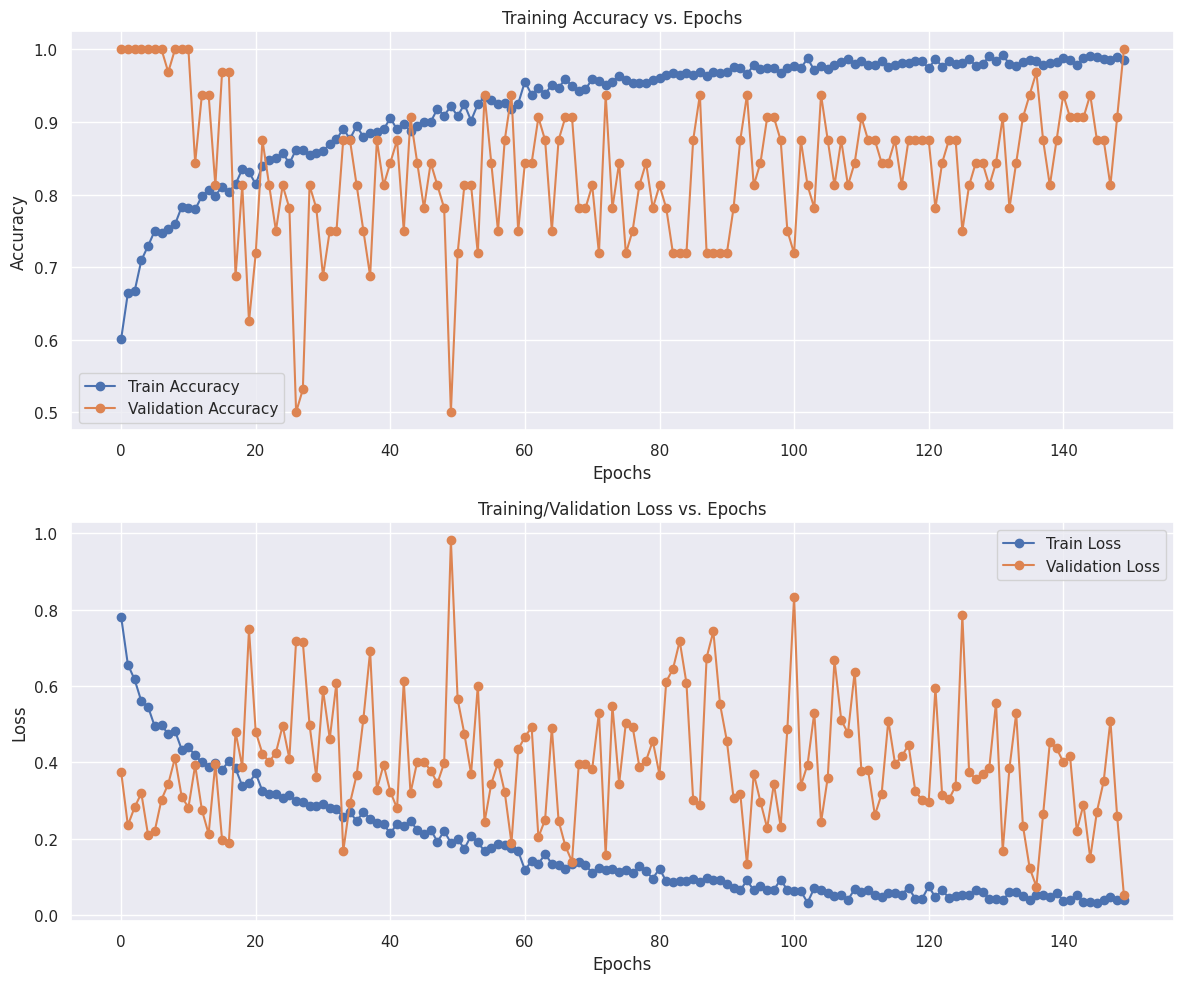

In [ ]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(12, 10))

ax[0].set_title('Training Accuracy vs. Epochs')
ax[0].plot(train_accuracy, 'o-', label='Train Accuracy')
ax[0].plot(val_accuracy, 'o-', label='Validation Accuracy')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Accuracy')
ax[0].legend(loc='best')

ax[1].set_title('Training/Validation Loss vs. Epochs')
ax[1].plot(train_loss, 'o-', label='Train Loss')
ax[1].plot(val_loss, 'o-', label='Validation Loss')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Loss')
ax[1].legend(loc='best')

plt.tight_layout()
plt.show()

In [ ]:
test_datagen = ImageDataGenerator(rescale=1.0/255)

test_generator = test_datagen.flow_from_directory(test_dataset_path,
                                                             target_size=TARGET_SIZE,
                                                             batch_size=BATCH_SIZE,
                                                             class_mode='categorical',
                                                             shuffle=True)

Found 1191 images belonging to 2 classes.


In [ ]:
labels = {value: key for key, value in train_generator.class_indices.items()}

print("Label Mappings for classes present in the training and validation datasets\n")
for key, value in labels.items():
    print(f"{key} : {value}")

Label Mappings for classes present in the training and validation datasets

0 : Negative
1 : Positive


38/38 [==============================] - 20s 384ms/step


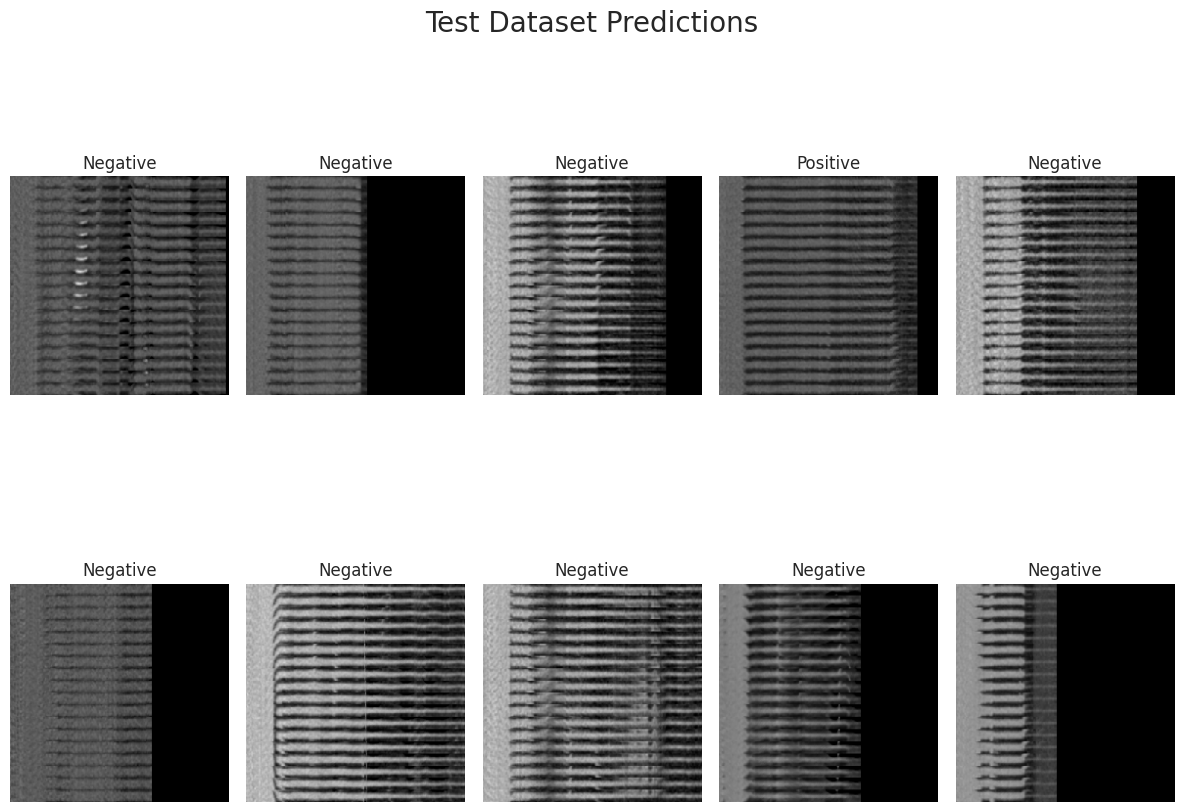

In [ ]:
predictions = model.predict(test_generator)
fig, ax = plt.subplots(nrows=2, ncols=5, figsize=(12, 10))
idx = 0

for i in range(2):
    for j in range(5):
        predicted_label = labels[np.argmax(predictions[idx])]
        ax[i, j].set_title(f"{predicted_label}")
        ax[i, j].imshow(test_generator[0][0][idx])
        ax[i, j].axis("off")
        idx += 1

plt.tight_layout()
plt.suptitle("Test Dataset Predictions", fontsize=20)
plt.show()

In [ ]:
test_loss, test_accuracy = model.evaluate(test_generator, batch_size=BATCH_SIZE)

38/38 [==============================] - 13s 350ms/step - loss: 0.4363 - acc: 0.8799


In [ ]:
print(f"Test Loss:     {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

Test Loss:     0.4363490343093872
Test Accuracy: 0.8799328207969666


38/38 [==============================] - 13s 345ms/step


Text(0.5, 151.24999999999994, 'Predicted')

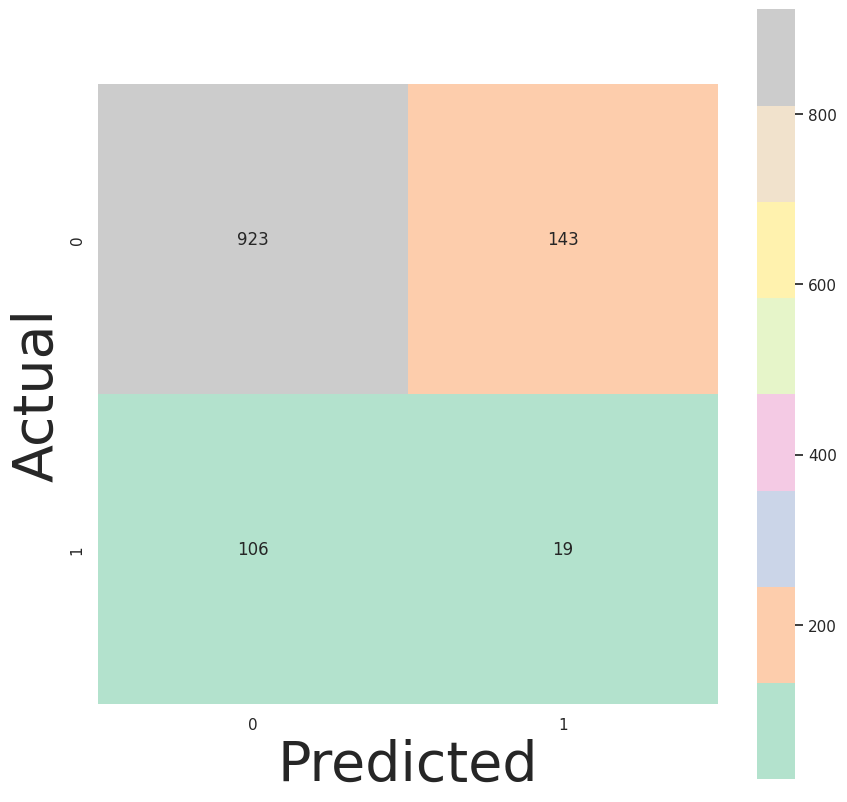

In [ ]:
# Confusion Matrix
Y_pred = model.predict(test_generator)

Y_pred = np.argmax(Y_pred, axis=1)
Y_true = test_generator.classes

cm = confusion_matrix(Y_true, Y_pred)
plt.figure(figsize=(10, 10))
ax = sns.heatmap(cm, cmap=plt.cm.Pastel2, annot=True, square=True, xticklabels=labels, yticklabels=labels,fmt='d')
ax.set_ylabel('Actual', fontsize=40)
ax.set_xlabel('Predicted', fontsize=40)

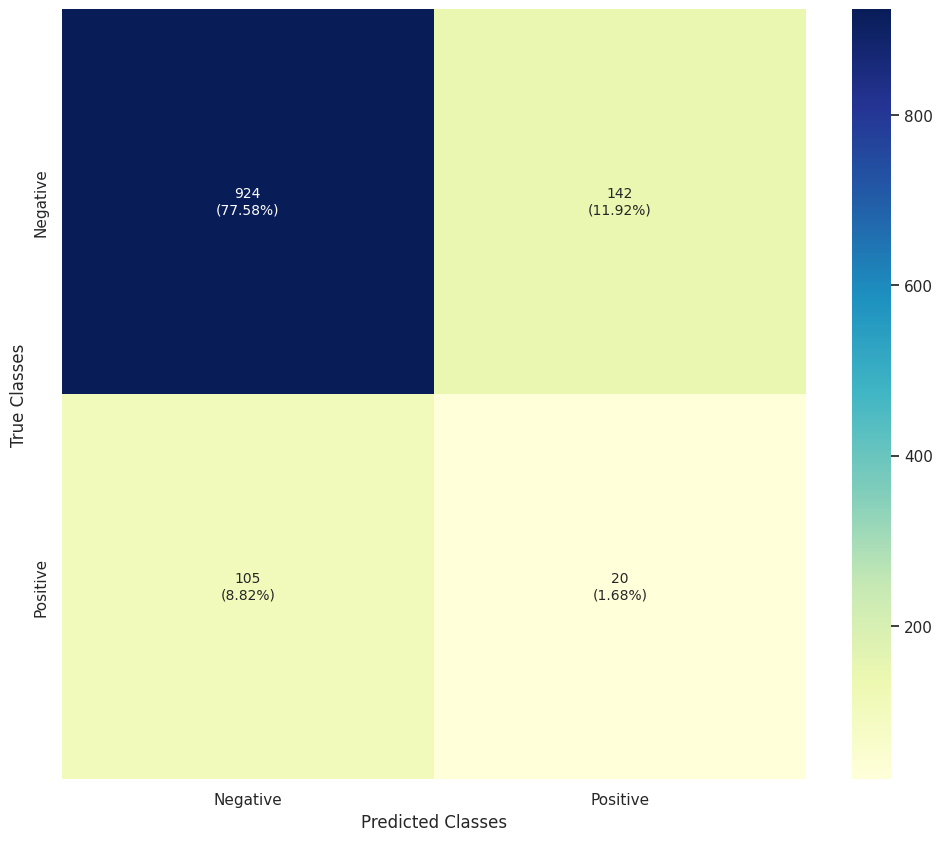

In [ ]:
y_pred = np.argmax(predictions, axis=1)
y_true = test_generator.classes

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Assuming cf_mtx is a 6x6 confusion matrix
cf_mtx = confusion_matrix(y_true, y_pred)

# Calculate group counts and percentages
group_counts = ["{0:0.0f}".format(value) for value in cf_mtx.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cf_mtx.flatten()/np.sum(cf_mtx)]
box_labels = [f"{v1}\n({v2})" for v1, v2 in zip(group_counts, group_percentages)]

# Reshape the box_labels based on the confusion matrix shape
box_labels = np.asarray(box_labels).reshape(cf_mtx.shape[0], cf_mtx.shape[1])

# Create heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(cf_mtx, xticklabels=labels.values(), yticklabels=labels.values(),
            cmap="YlGnBu", fmt="", annot=box_labels, annot_kws={"size": 10})
plt.xlabel('Predicted Classes')
plt.ylabel('True Classes')
plt.show()


In [ ]:
print(classification_report(y_true, y_pred, target_names=labels.values()))

              precision    recall  f1-score   support

    Negative       0.90      0.87      0.88      1066
    Positive       0.12      0.16      0.14       125

    accuracy                           0.79      1191
   macro avg       0.51      0.51      0.51      1191
weighted avg       0.82      0.79      0.80      1191

